<a href="https://colab.research.google.com/github/Srikanth635/COMNETS/blob/main/Source_Code/XGBoost_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import json
import re
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

In [ ]:
final_df = pd.read_excel('/content/drive/MyDrive/cluster.xlsx',index_col=0)
final_df['totaljobclocktimesec'] = final_df['totaljobclocktimesec'].astype('float')

In [ ]:
final_df.forwardingLayer.value_counts()

KEpidemicRoutingLayer     163
KKeetchiLayer              91
KRRSLayer                  81
KSpraywaitRoutingLayer     63
KProphetRoutingLayer       36
Name: forwardingLayer, dtype: int64

In [ ]:
dummy_forward = pd.get_dummies(final_df,columns=['forwardingLayer','app_layer'],drop_first=True,dtype='int64')
final_df = dummy_forward.drop('runconfig',axis=1)
final_df.reset_index(drop=True,inplace=True)
final_df.shape

(434, 17)

In [ ]:
final_df.head(2)

,numNodes,dataGenerationInterval,dataSizeInBytes,constraintAreaMaxX,constraintAreaMaxY,noOfLocations,Hosts,maximumCacheSize,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec,forwardingLayer_KKeetchiLayer,forwardingLayer_KProphetRoutingLayer,forwardingLayer_KRRSLayer,forwardingLayer_KSpraywaitRoutingLayer,app_layer_KMessengerApp
0,10,1,10000,500,500,120,40,5000000,2364392558,691175424,763359232,207.862526,0,0,0,1,1
1,10,90,10000,500,500,100,50,100000000,1526351178,681267200,762765312,130.187741,1,0,0,0,0


In [ ]:
main_set = final_df.drop(['peak_disk_usage', 'peak_sim_ram_usage','peak_results_ram_usage','totaljobclocktimesec'],axis=1)
class_set = final_df[['peak_disk_usage', 'peak_sim_ram_usage','peak_results_ram_usage','totaljobclocktimesec']]
X_trainNo,X_testNo,y_trainNo,y_testNo = train_test_split(main_set,class_set,test_size=0.1,random_state=42)

In [ ]:
X_trainNo.describe()

,numNodes,dataGenerationInterval,dataSizeInBytes,constraintAreaMaxX,constraintAreaMaxY,noOfLocations,Hosts,maximumCacheSize,forwardingLayer_KKeetchiLayer,forwardingLayer_KProphetRoutingLayer,forwardingLayer_KRRSLayer,forwardingLayer_KSpraywaitRoutingLayer,app_layer_KMessengerApp
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,3.900000e+02,390.000000,390.000000,390.000000,390.000000,390.000000
mean,301.064103,200.166667,133200.512821,1102.179487,1096.794872,213.953846,364.694872,4.723026e+07,0.210256,0.079487,0.194872,0.143590,0.430769
std,267.392558,346.373560,293506.156244,440.642927,435.885452,117.827890,279.141240,1.550587e+08,0.408014,0.270845,0.396611,0.351124,0.495820
min,10.000000,1.000000,10000.000000,200.000000,400.000000,50.000000,25.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,1.000000,10000.000000,500.000000,500.000000,150.000000,100.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200.000000,9.000000,10000.000000,1500.000000,1200.000000,200.000000,400.000000,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,500.000000,90.000000,100000.000000,1500.000000,1500.000000,200.000000,500.000000,5.000000e+06,0.000000,0.000000,0.000000,0.000000,1.000000
max,1000.000000,900.000000,1000000.000000,1700.000000,1700.000000,600.000000,1000.000000,1.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_testNo.describe()

,numNodes,dataGenerationInterval,dataSizeInBytes,constraintAreaMaxX,constraintAreaMaxY,noOfLocations,Hosts,maximumCacheSize,forwardingLayer_KKeetchiLayer,forwardingLayer_KProphetRoutingLayer,forwardingLayer_KRRSLayer,forwardingLayer_KSpraywaitRoutingLayer,app_layer_KMessengerApp
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000
mean,307.954545,185.136364,145040.909091,1090.909091,1090.909091,206.818182,384.545455,5.066364e+07,0.204545,0.113636,0.113636,0.159091,0.477273
std,303.989592,342.416963,311797.297241,463.464297,463.464297,103.480652,313.236700,1.904291e+08,0.408032,0.321038,0.321038,0.369989,0.505258
min,25.000000,1.000000,10000.000000,500.000000,500.000000,50.000000,25.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,9.000000,10000.000000,500.000000,500.000000,200.000000,100.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,9.000000,10000.000000,1500.000000,1500.000000,200.000000,375.000000,5.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,605.000000,90.000000,100000.000000,1500.000000,1500.000000,200.000000,500.000000,5.000000e+06,0.000000,0.000000,0.000000,0.000000,1.000000
max,1000.000000,900.000000,1000000.000000,1700.000000,1700.000000,500.000000,1000.000000,1.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### Standardization
feat_scale = StandardScaler()
train_feat = feat_scale.fit_transform(X_trainNo)
test_feat = feat_scale.transform(X_testNo)

targ_scale = StandardScaler()
train_targ = targ_scale.fit_transform(y_trainNo)
test_targ = targ_scale.transform(y_testNo)

### Standardization
nor_train_feat_df = pd.DataFrame(train_feat,columns=X_trainNo.columns)
nor_train_target_df = pd.DataFrame(train_targ,columns=y_trainNo.columns)

nor_test_feat_df = pd.DataFrame(test_feat,columns=X_trainNo.columns)
nor_test_target_df = pd.DataFrame(test_targ,columns=y_trainNo.columns)

In [ ]:
# graphXG = xgb.XGBRegressor(base_score=0.5, booster='gbtree',learning_rate=0.1,n_estimators=400,reg_alpha=10,
#              reg_lambda=0,gamma=10,objective='reg:squarederror',subsample=0.8,colsample_bytree=0.9,colsample_bylevel=0.9,colsample_bynode=0.9,max_depth=3)
graphXG = xgb.XGBRegressor(base_score=1, booster='gbtree',
             learning_rate=0.1, n_estimators=400, reg_alpha=0,reg_lambda=100,gamma=100)

In [ ]:
X_trainNo.shape

(390, 13)

In [ ]:
evalset = [(X_trainNo, y_trainNo.peak_sim_ram_usage),(X_testNo,y_testNo.peak_sim_ram_usage)]

In [ ]:
graphXG.fit(X_trainNo,y_trainNo.peak_sim_ram_usage,eval_metric='mae',eval_set=evalset)

[03:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:2.05964e+10	validation_1-mae:2.43597e+10
[1]	validation_0-mae:1.94461e+10	validation_1-mae:2.31685e+10
[2]	validation_0-mae:1.82681e+10	validation_1-mae:2.19569e+10
[3]	validation_0-mae:1.718e+10	validation_1-mae:2.087e+10
[4]	validation_0-mae:1.62281e+10	validation_1-mae:1.99206e+10
[5]	validation_0-mae:1.53055e+10	validation_1-mae:1.89726e+10
[6]	validation_0-mae:1.44875e+10	validation_1-mae:1.81557e+10
[7]	validation_0-mae:1.36843e+10	validation_1-mae:1.7329e+10
[8]	validation_0-mae:1.2932e+10	validation_1-mae:1.65557e+10
[9]	validation_0-mae:1.22969e+10	validation_1-mae:1.58907e+10
[10]	validation_0-mae:1.16948e+10	validation_1-mae:1.53272e+10
[11]	validation_0-mae:1.11405e+10	validation_1-mae:1.48107e+10
[12]	validation_0-mae:1.07157e+10	validation_1-mae:1.43926e+10
[13]	validation_0-mae:1.03224e+10	validation_1-mae:1.40237e+10
[14]	va

XGBRegressor(base_score=1, gamma=100, n_estimators=400, reg_lambda=100)

In [ ]:
graphXG_pred = graphXG.predict(X_testNo)

In [ ]:
print("r2_Score ",r2_score(y_testNo.peak_sim_ram_usage,graphXG_pred))
print("MAE: ",mae(y_testNo.peak_sim_ram_usage,graphXG_pred))
print("RMSE: ",np.sqrt(mse(y_testNo.peak_sim_ram_usage,graphXG_pred)))

r2_Score  0.9147599347691922
MAE:  5795454618.863636
RMSE:  16176144483.051525


In [ ]:
results = graphXG.evals_result()

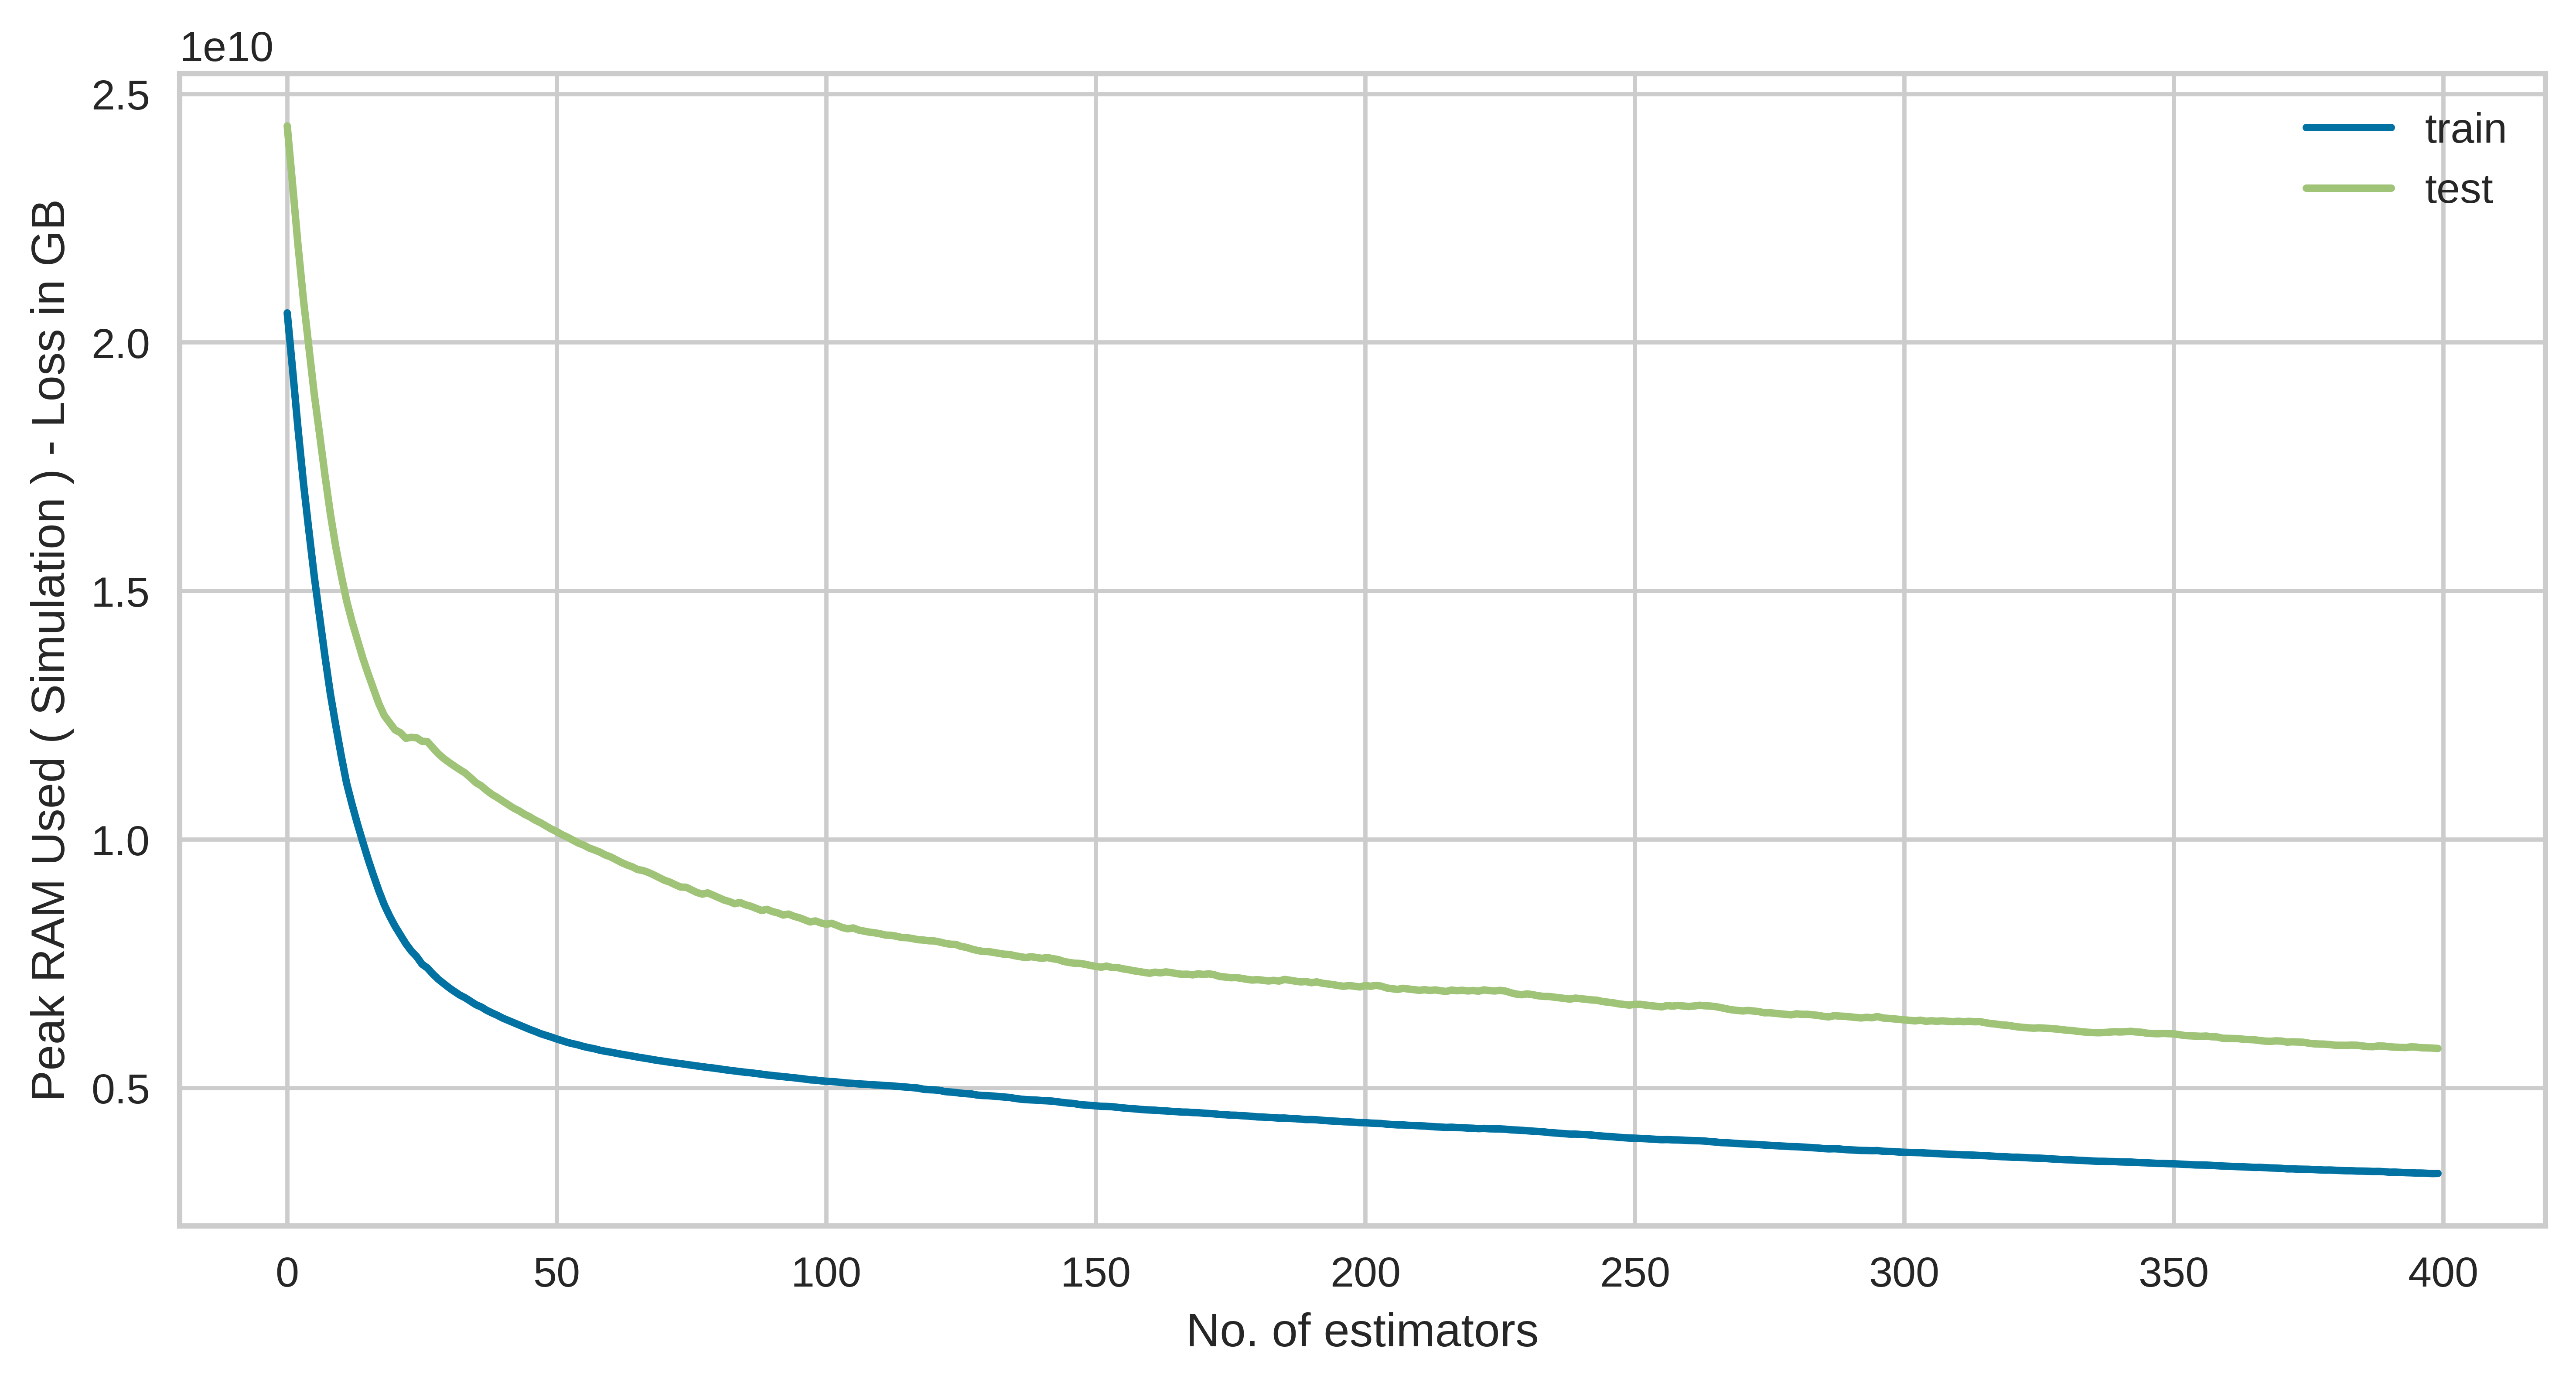

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 700
plt.plot(results['validation_0']['mae'], label='train')
plt.plot(results['validation_1']['mae'], label='test')
plt.xlabel("No. of estimators")
plt.ylabel("Peak RAM Used ( Simulation ) - Loss in GB")
# plt.title("Model Mean Absolute Error (MAE) loss plot")
plt.legend()
plt.show()

Text(0.5, 1.0, ' ')

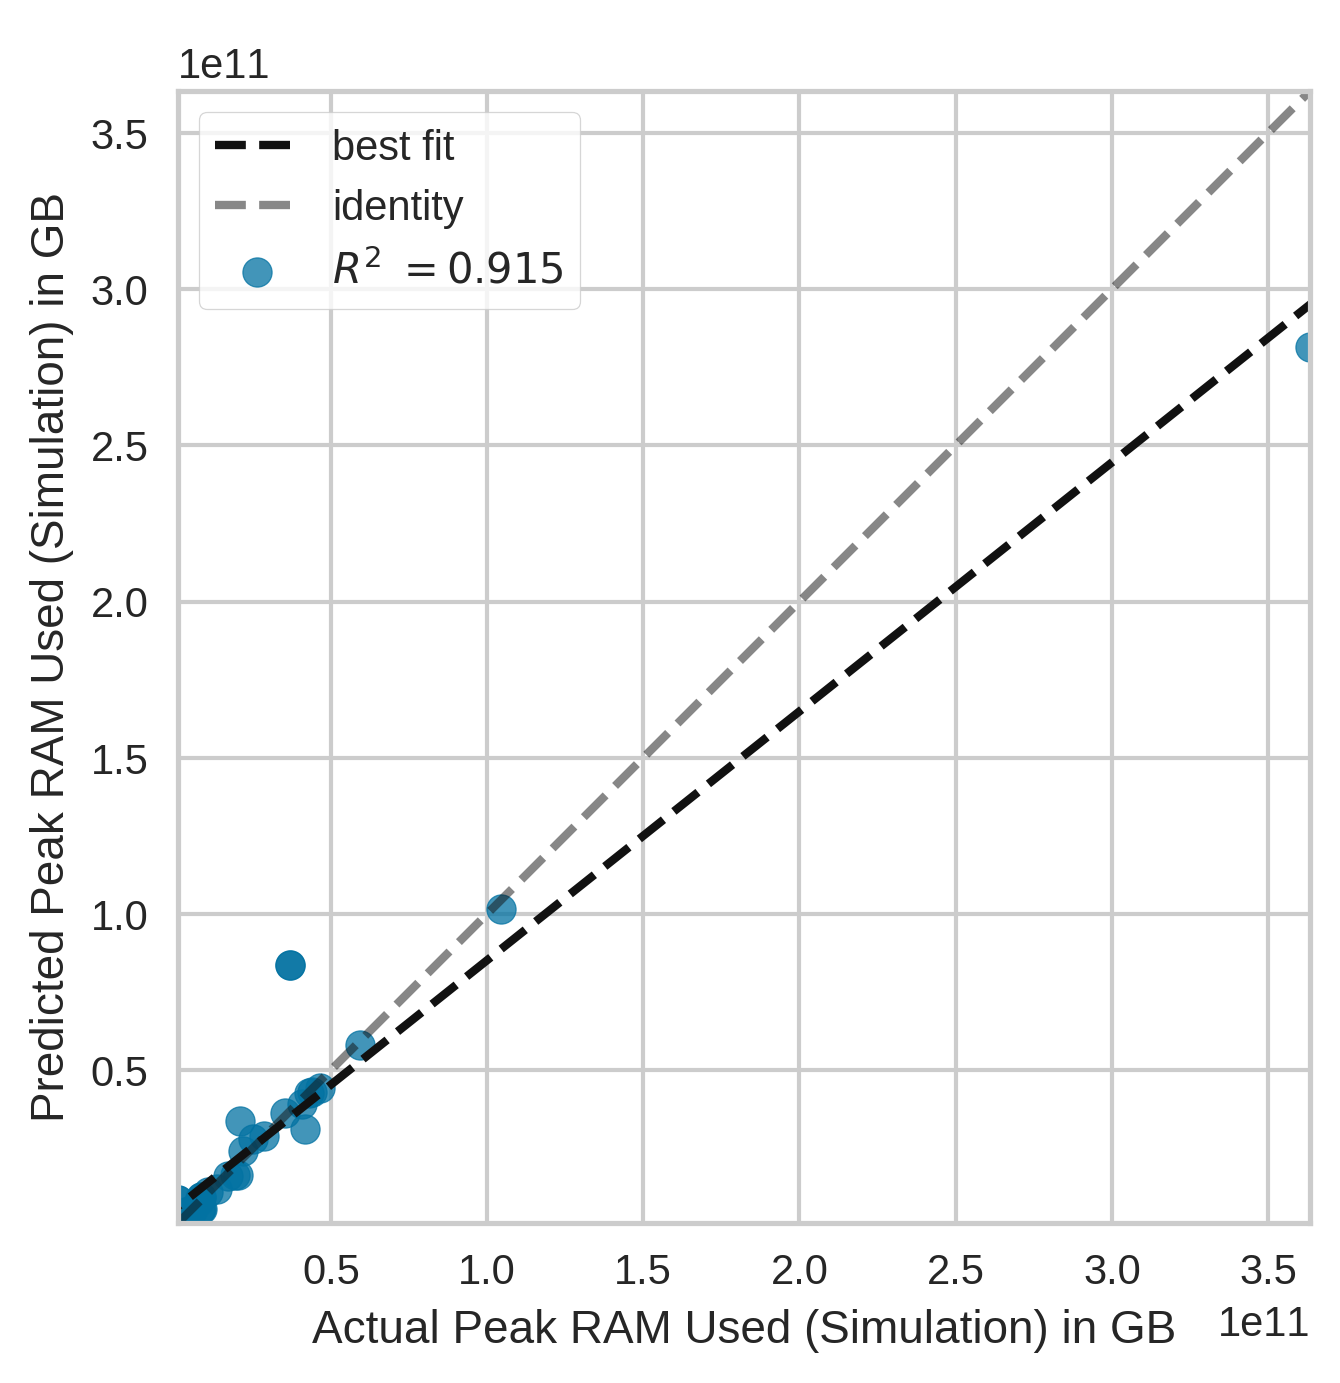

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 300
fig = plt.figure()
ax = fig.add_subplot(111)
# Fit the visualizer
Pmodel = PredictionError(graphXG)
Pmodel.fit(X_trainNo,  y_trainNo.peak_sim_ram_usage)
Pmodel.score(X_testNo, y_testNo.peak_sim_ram_usage)
# Call finalize to draw the final yellowbrick-specific elements
Pmodel.finalize()
# Get access to the axes object and modify labels
Pmodel.ax.set_xlabel("Actual Peak RAM Used (Simulation) in GB")
Pmodel.ax.set_ylabel("Predicted Peak RAM Used (Simulation) in GB")
Pmodel.ax.set_title(" ")
# plt.savefig("peplot.pdf")

Text(0.5, 1.0, ' ')

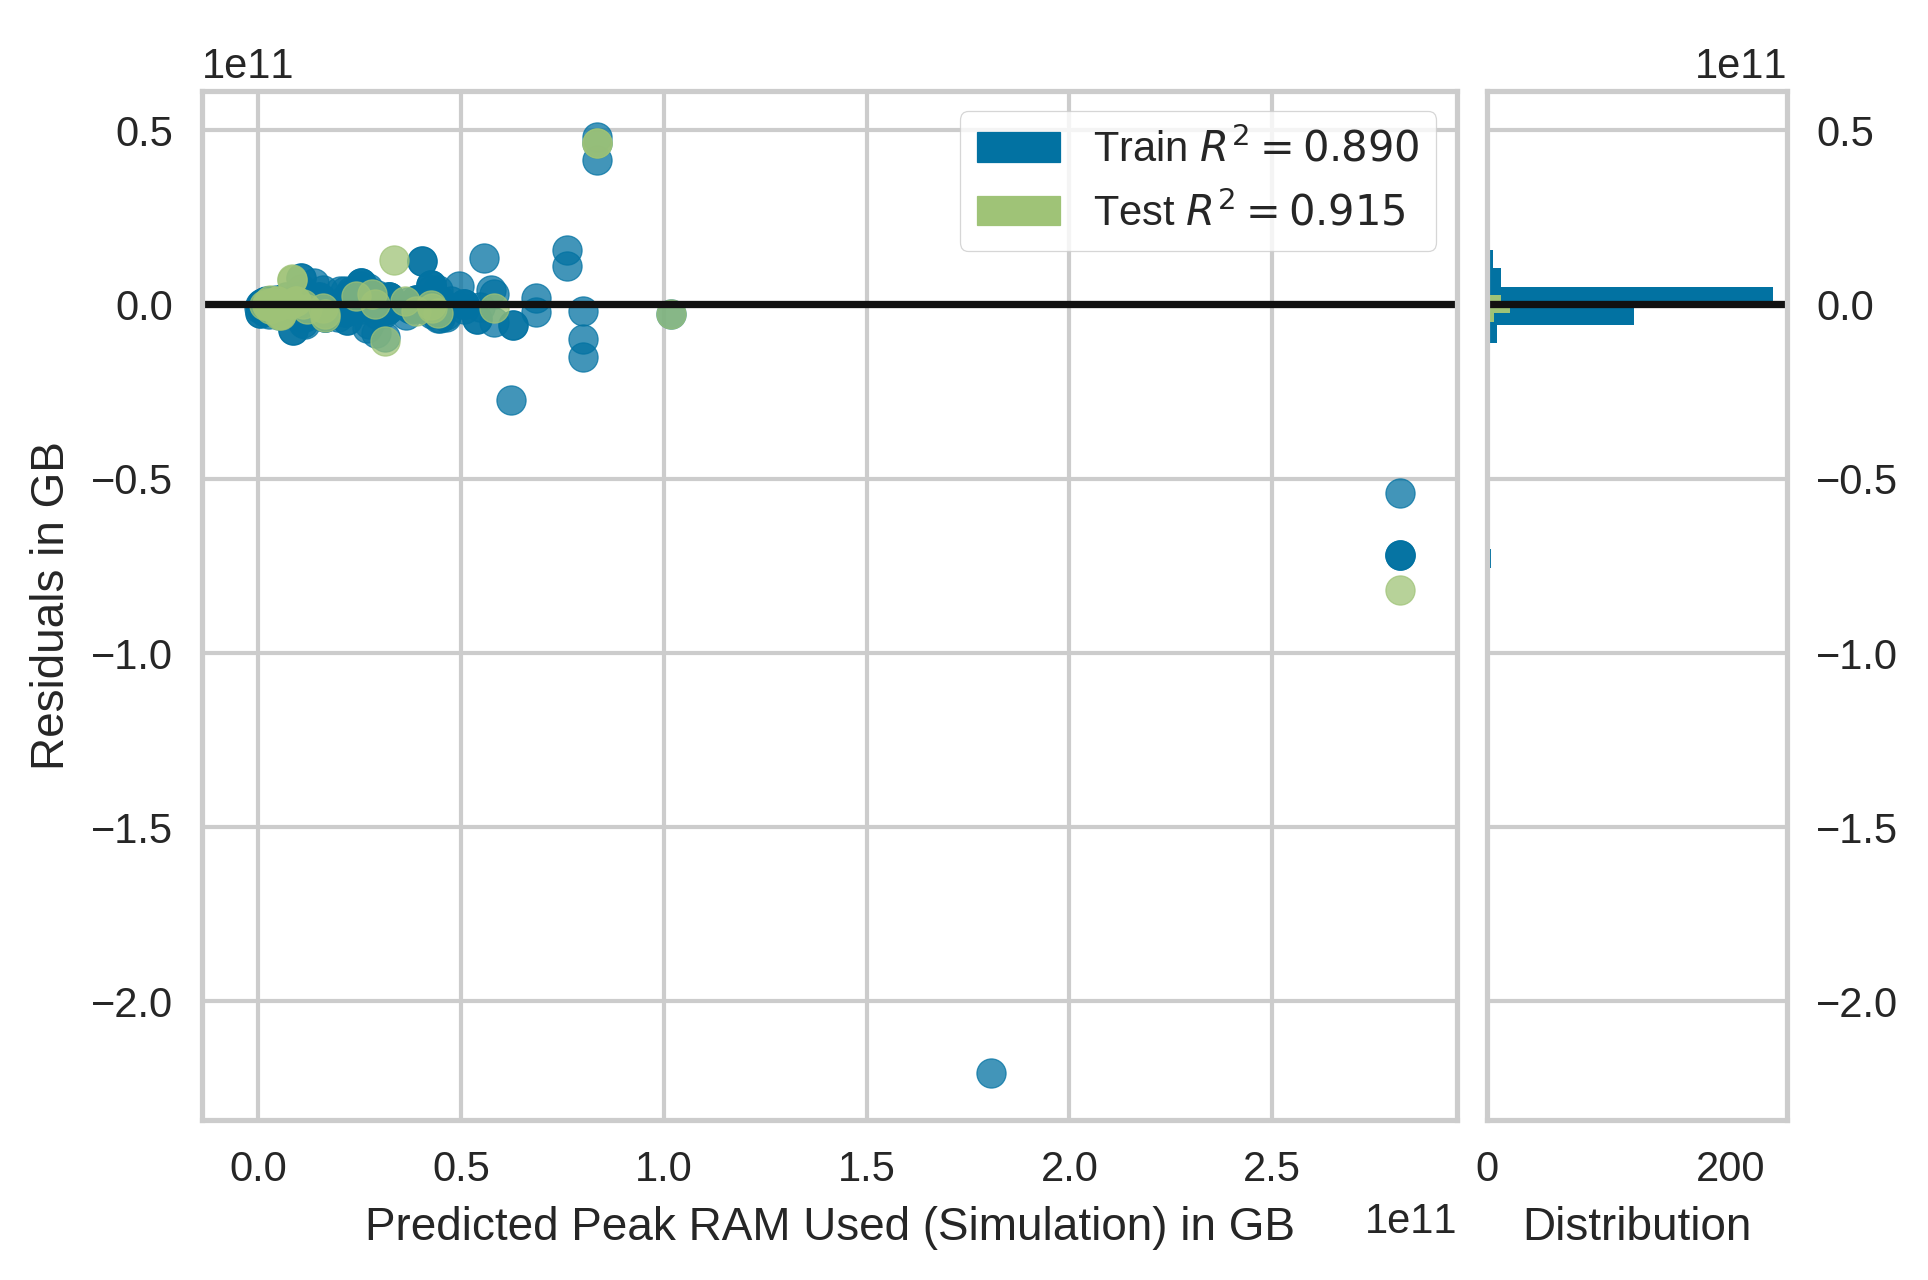

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["figure.dpi"] = 300
fig = plt.figure()
ax = fig.add_subplot(222)
# Fit the visualizer
Qmodel = ResidualsPlot(graphXG)
Qmodel.fit(X_trainNo,  y_trainNo.peak_sim_ram_usage)
Qmodel.score(X_testNo, y_testNo.peak_sim_ram_usage)
# Call finalize to draw the final yellowbrick-specific elements
Qmodel.finalize()
# Get access to the axes object and modify labels
Qmodel.ax.set_xlabel("Predicted Peak RAM Used (Simulation) in GB")
Qmodel.ax.set_ylabel("Residuals in GB")
Qmodel.ax.set_title(" ")
# plt.savefig("peplot.pdf")

In [ ]:
from yellowbrick.target import FeatureCorrelation

In [ ]:
final_df.head(1)

,numNodes,dataGenerationInterval,dataSizeInBytes,constraintAreaMaxX,constraintAreaMaxY,noOfLocations,Hosts,maximumCacheSize,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec,forwardingLayer_KKeetchiLayer,forwardingLayer_KProphetRoutingLayer,forwardingLayer_KRRSLayer,forwardingLayer_KSpraywaitRoutingLayer,app_layer_KMessengerApp
0,10,1,10000,500,500,120,40,5000000,2364392558,691175424,763359232,207.862526,0,0,0,1,1


Text(0.5, 1.0, 'Feature correlation with Peak RAM Used (Simulation)')

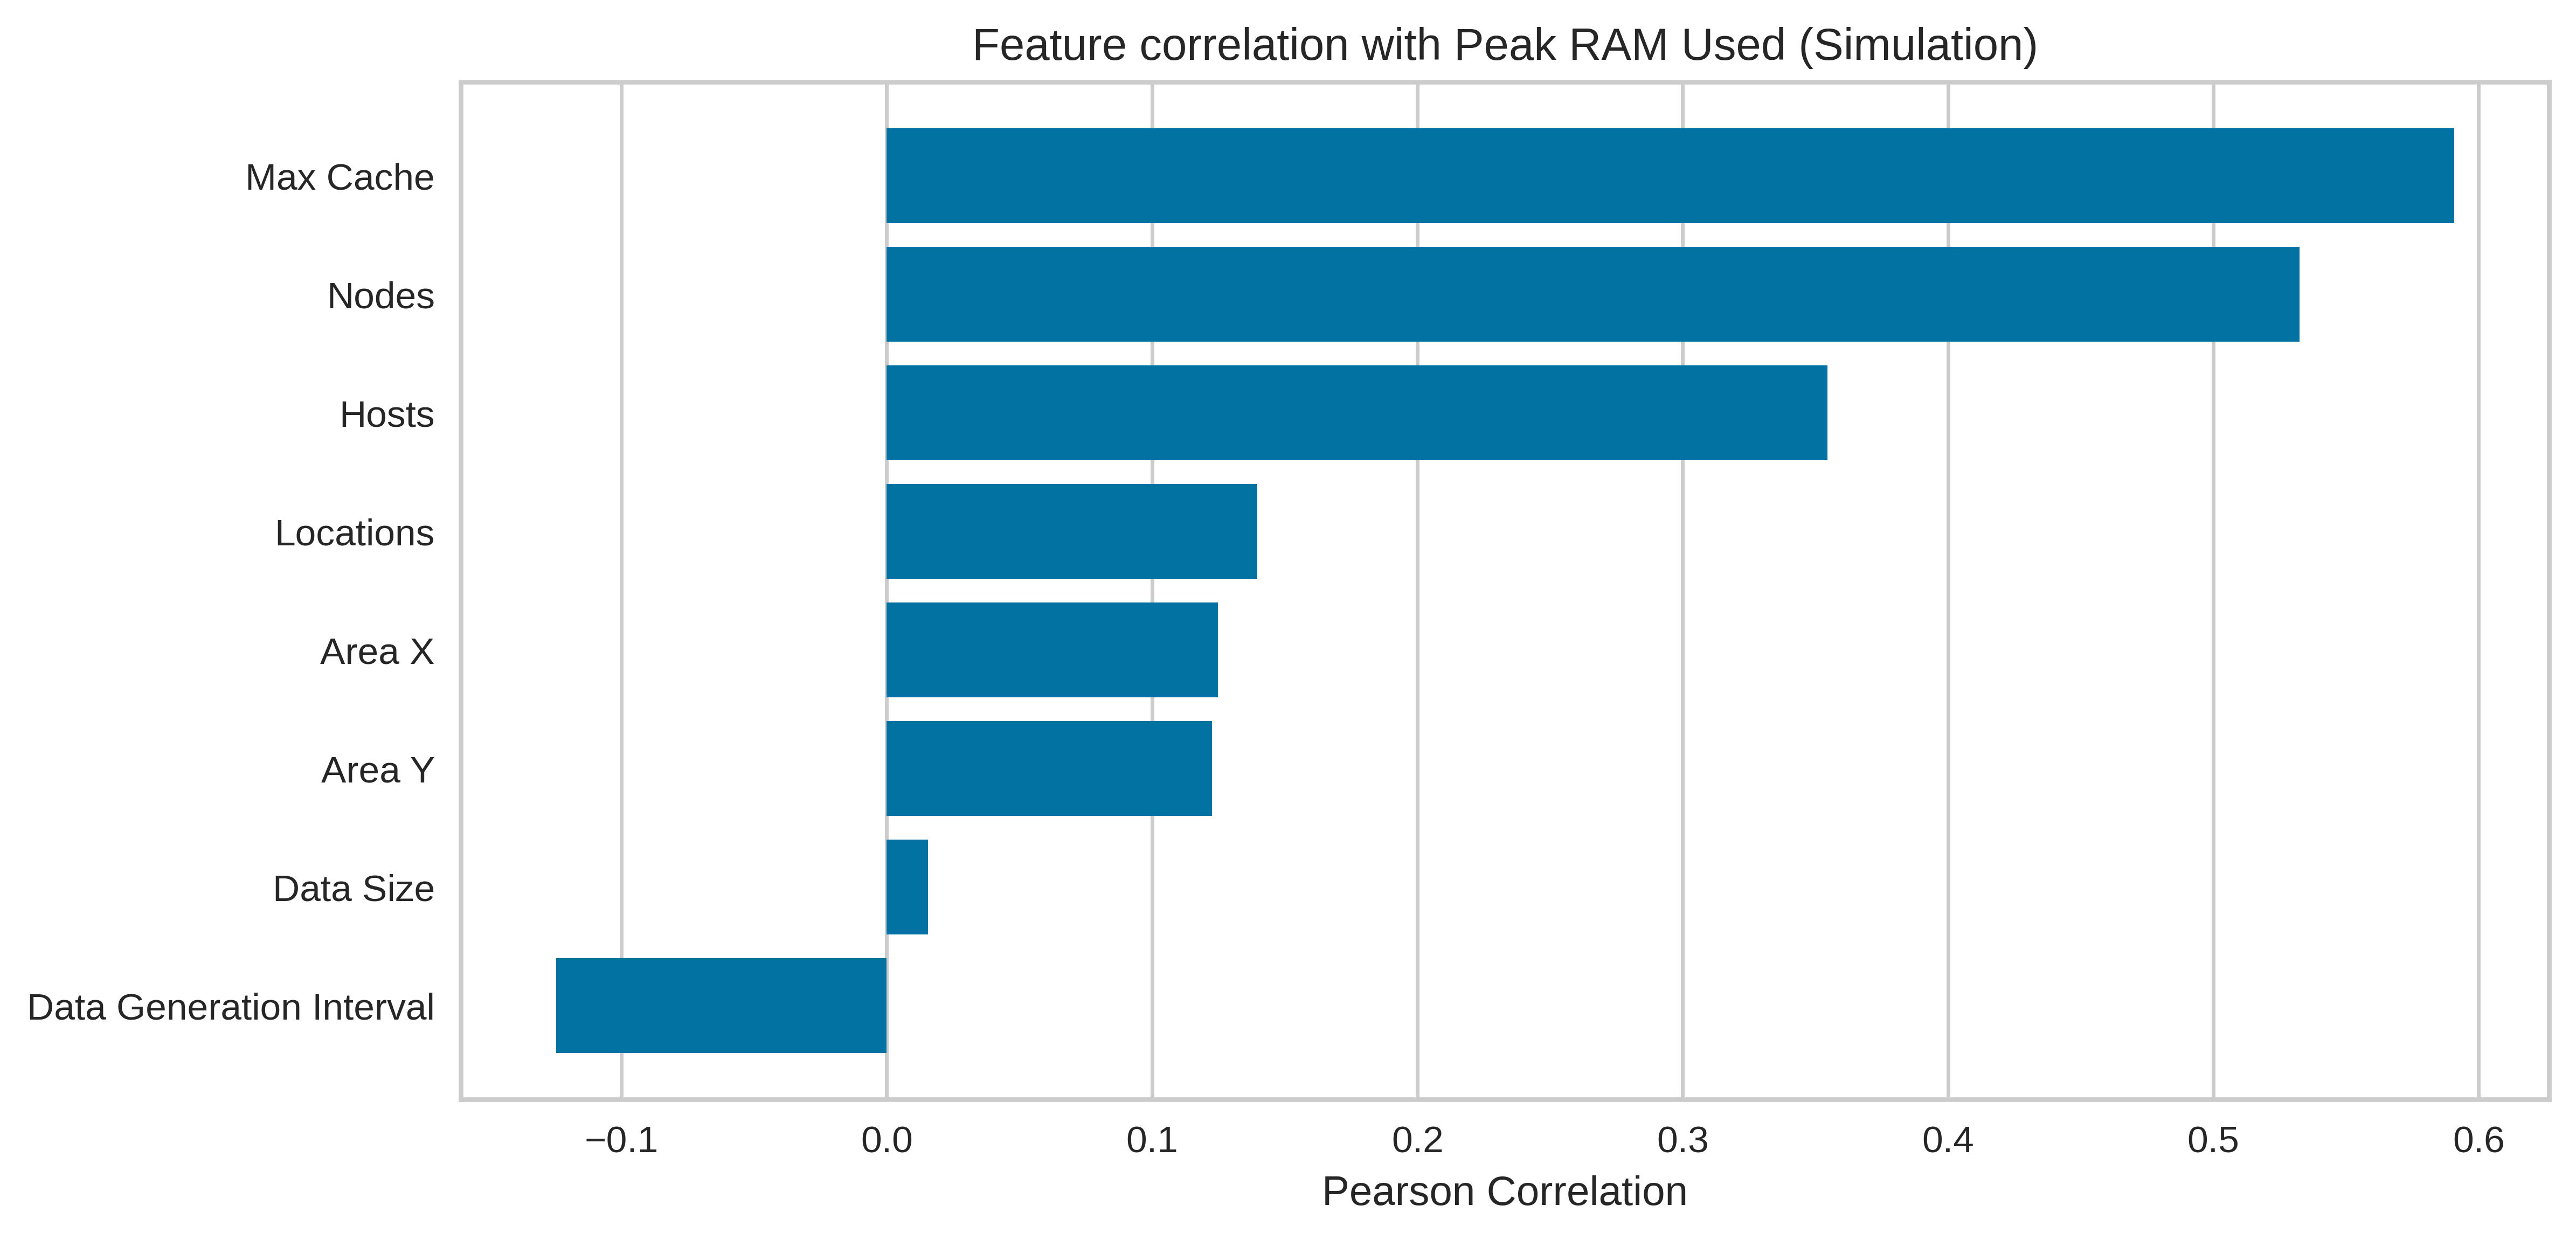

In [ ]:
X = main_set.drop(['forwardingLayer_KKeetchiLayer','forwardingLayer_KProphetRoutingLayer',	'forwardingLayer_KRRSLayer',	'forwardingLayer_KSpraywaitRoutingLayer',	'app_layer_KMessengerApp'],axis=1)
y= class_set.peak_sim_ram_usage

# fig = plt.figure()
# ax = fig.add_subplot(333)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
features = np.array(main_set.columns)
labelss = np.array(['Nodes', 'Data Generation Interval' ,'Data Size',
 'Area X', 'Area Y' ,'Locations', 'Hosts',
 'Max Cache', 'forwardingLayer_KKeetchiLayer',
 'forwardingLayer_KProphetRoutingLayer' ,'forwardingLayer_KRRSLayer',
 'forwardingLayer_KSpraywaitRoutingLayer', 'app_layer_KMessengerApp']) 
visualizer = FeatureCorrelation(labels=labelss,sort=True)
visualizer.fit(X, y)
visualizer.finalize()
# visualizer.ax.set_xlabel("Predicted Values in GB")
# visualizer.ax.set_ylabel("Residuals in GB")
visualizer.ax.set_title("Feature correlation with Peak RAM Used (Simulation)")
# visualizer.ax.set_title("Features")
# visualizer.show() 

(13,)


Text(0.5, 1.0, 'Feature correlation with Peak RAM Used (Results)')

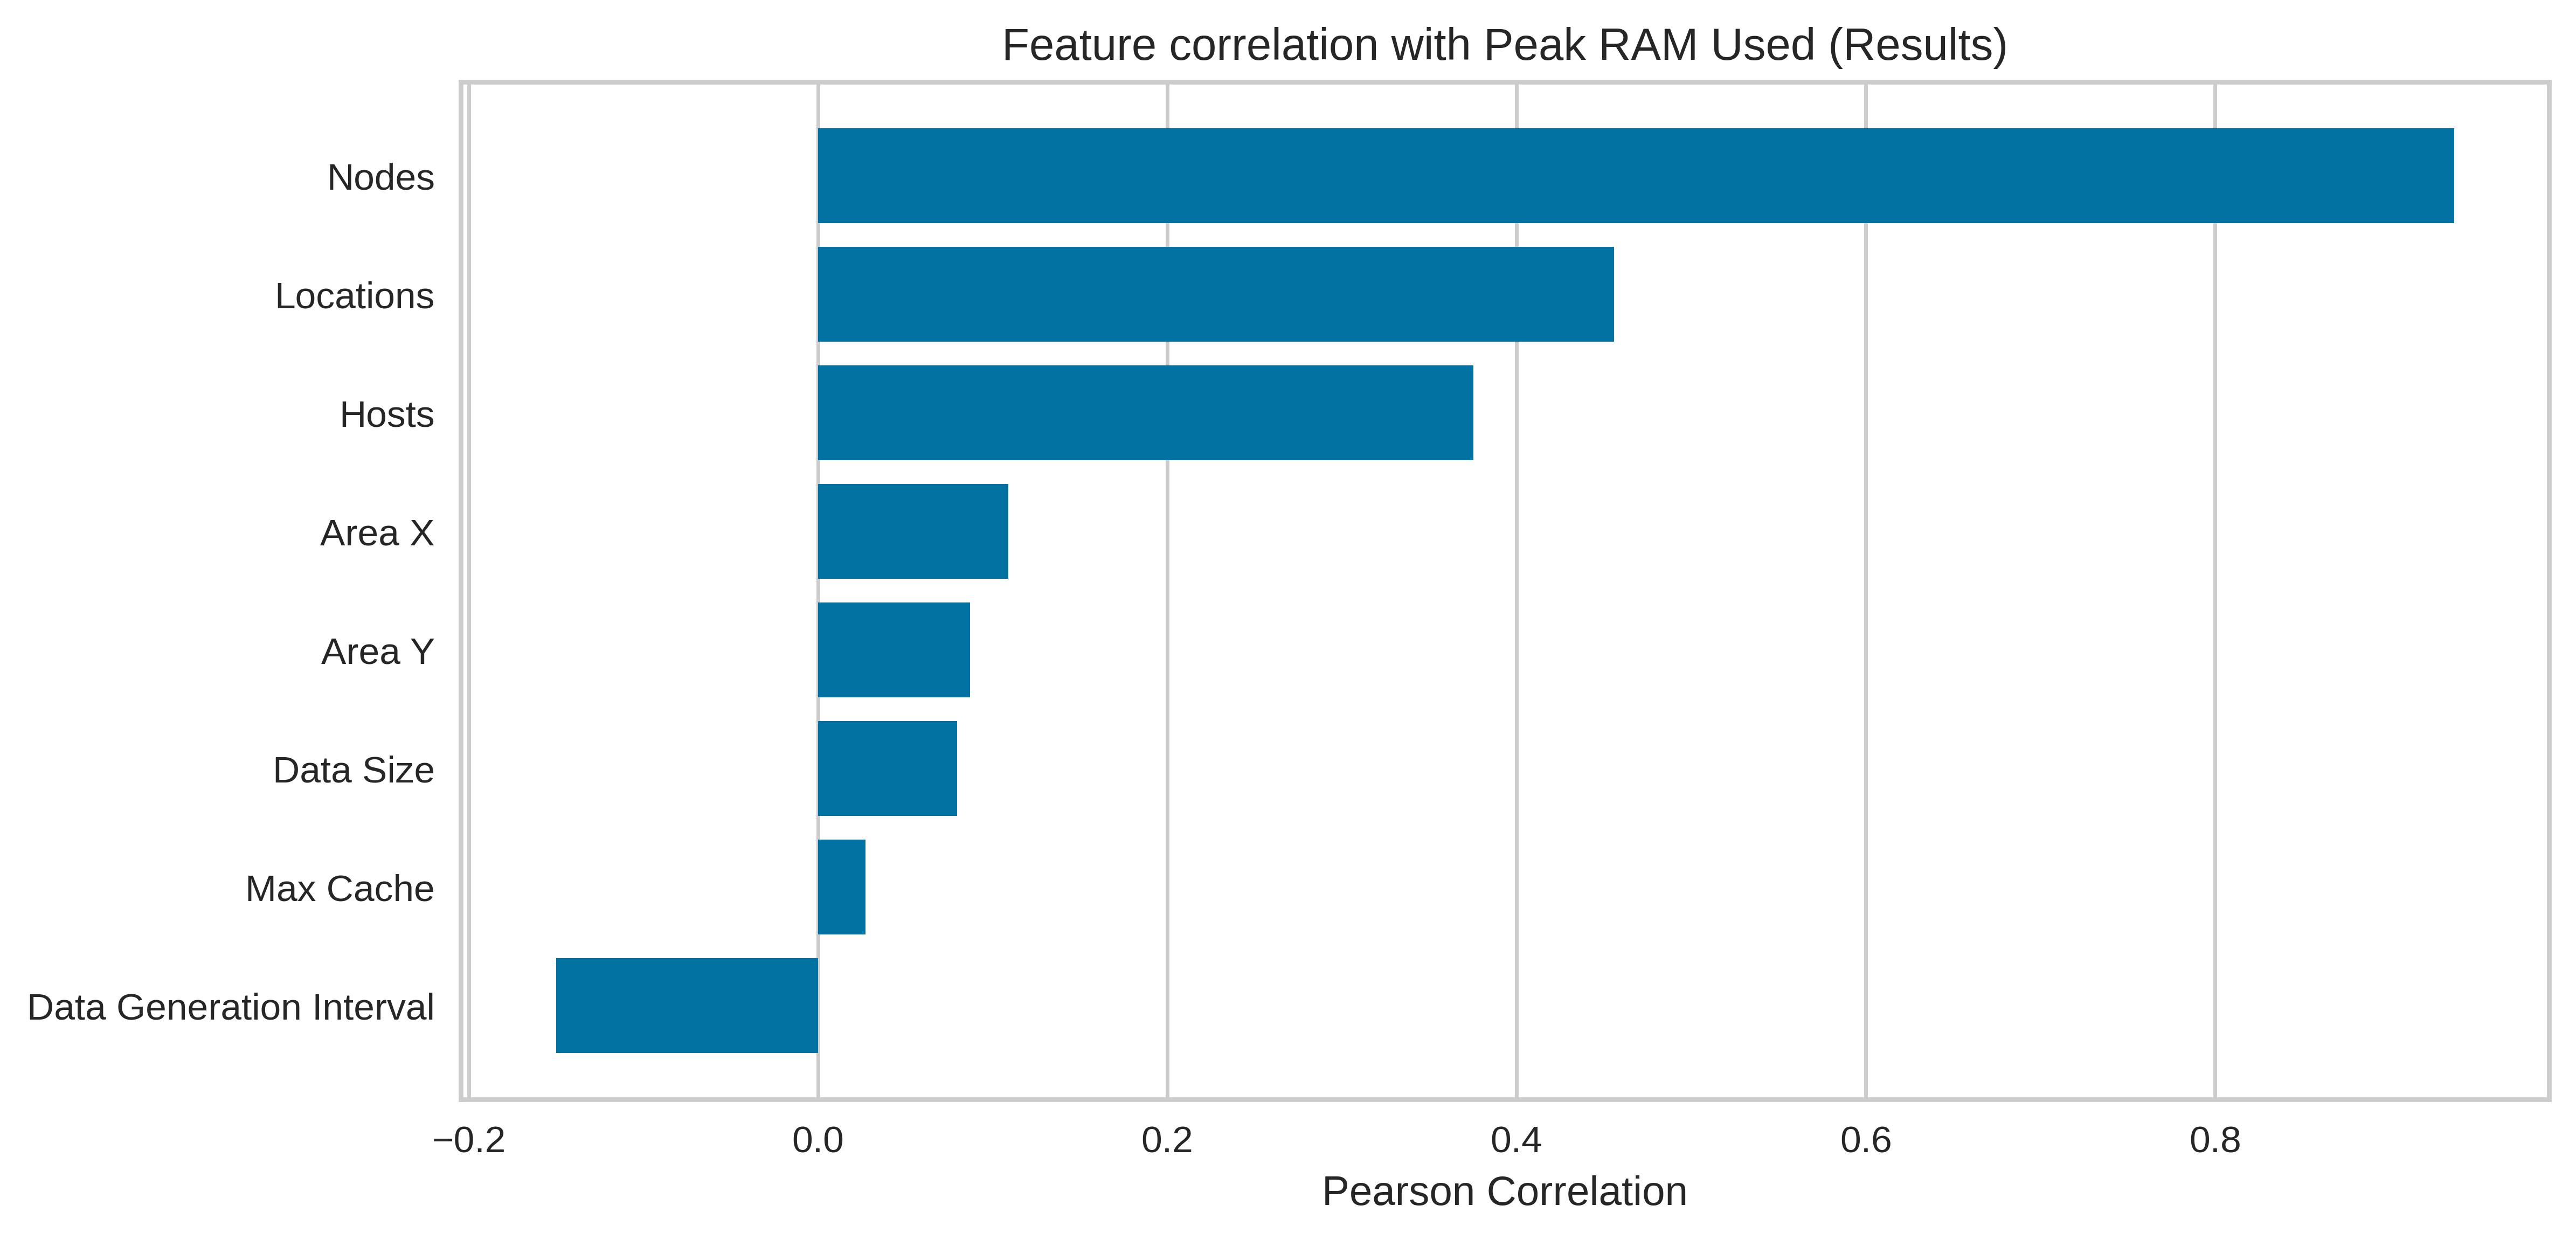

In [ ]:
X = main_set.drop(['forwardingLayer_KKeetchiLayer','forwardingLayer_KProphetRoutingLayer',	'forwardingLayer_KRRSLayer',	'forwardingLayer_KSpraywaitRoutingLayer',	'app_layer_KMessengerApp'],axis=1)
y= class_set.peak_results_ram_usage

# fig = plt.figure()
# ax = fig.add_subplot(333)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
features = np.array(main_set.columns)
print(features.shape)
labelss = np.array(['Nodes', 'Data Generation Interval' ,'Data Size',
 'Area X', 'Area Y' ,'Locations', 'Hosts',
 'Max Cache', 'forwardingLayer_KKeetchiLayer',
 'forwardingLayer_KProphetRoutingLayer' ,'forwardingLayer_KRRSLayer',
 'forwardingLayer_KSpraywaitRoutingLayer', 'app_layer_KMessengerApp']) 
visualizer = FeatureCorrelation(labels=labelss,sort=True)
visualizer.fit(X, y)
visualizer.finalize()
# visualizer.ax.set_xlabel("Predicted Values in GB")
# visualizer.ax.set_ylabel("Residuals in GB")
visualizer.ax.set_title("Feature correlation with Peak RAM Used (Results)")
# visualizer.ax.set_title("Features")
# visualizer.show() 

In [ ]:
X['Maxcache/dataSize'] = X.maximumCacheSize/X.dataSizeInBytes

In [ ]:
X.drop(['dataSizeInBytes','maximumCacheSize'],axis=1,inplace=True)
X.head(2)

,numNodes,dataGenerationInterval,constraintAreaMaxX,constraintAreaMaxY,noOfLocations,Hosts,Maxcache/dataSize
0,10,1,500,500,120,40,500.0
1,10,90,500,500,100,50,10000.0


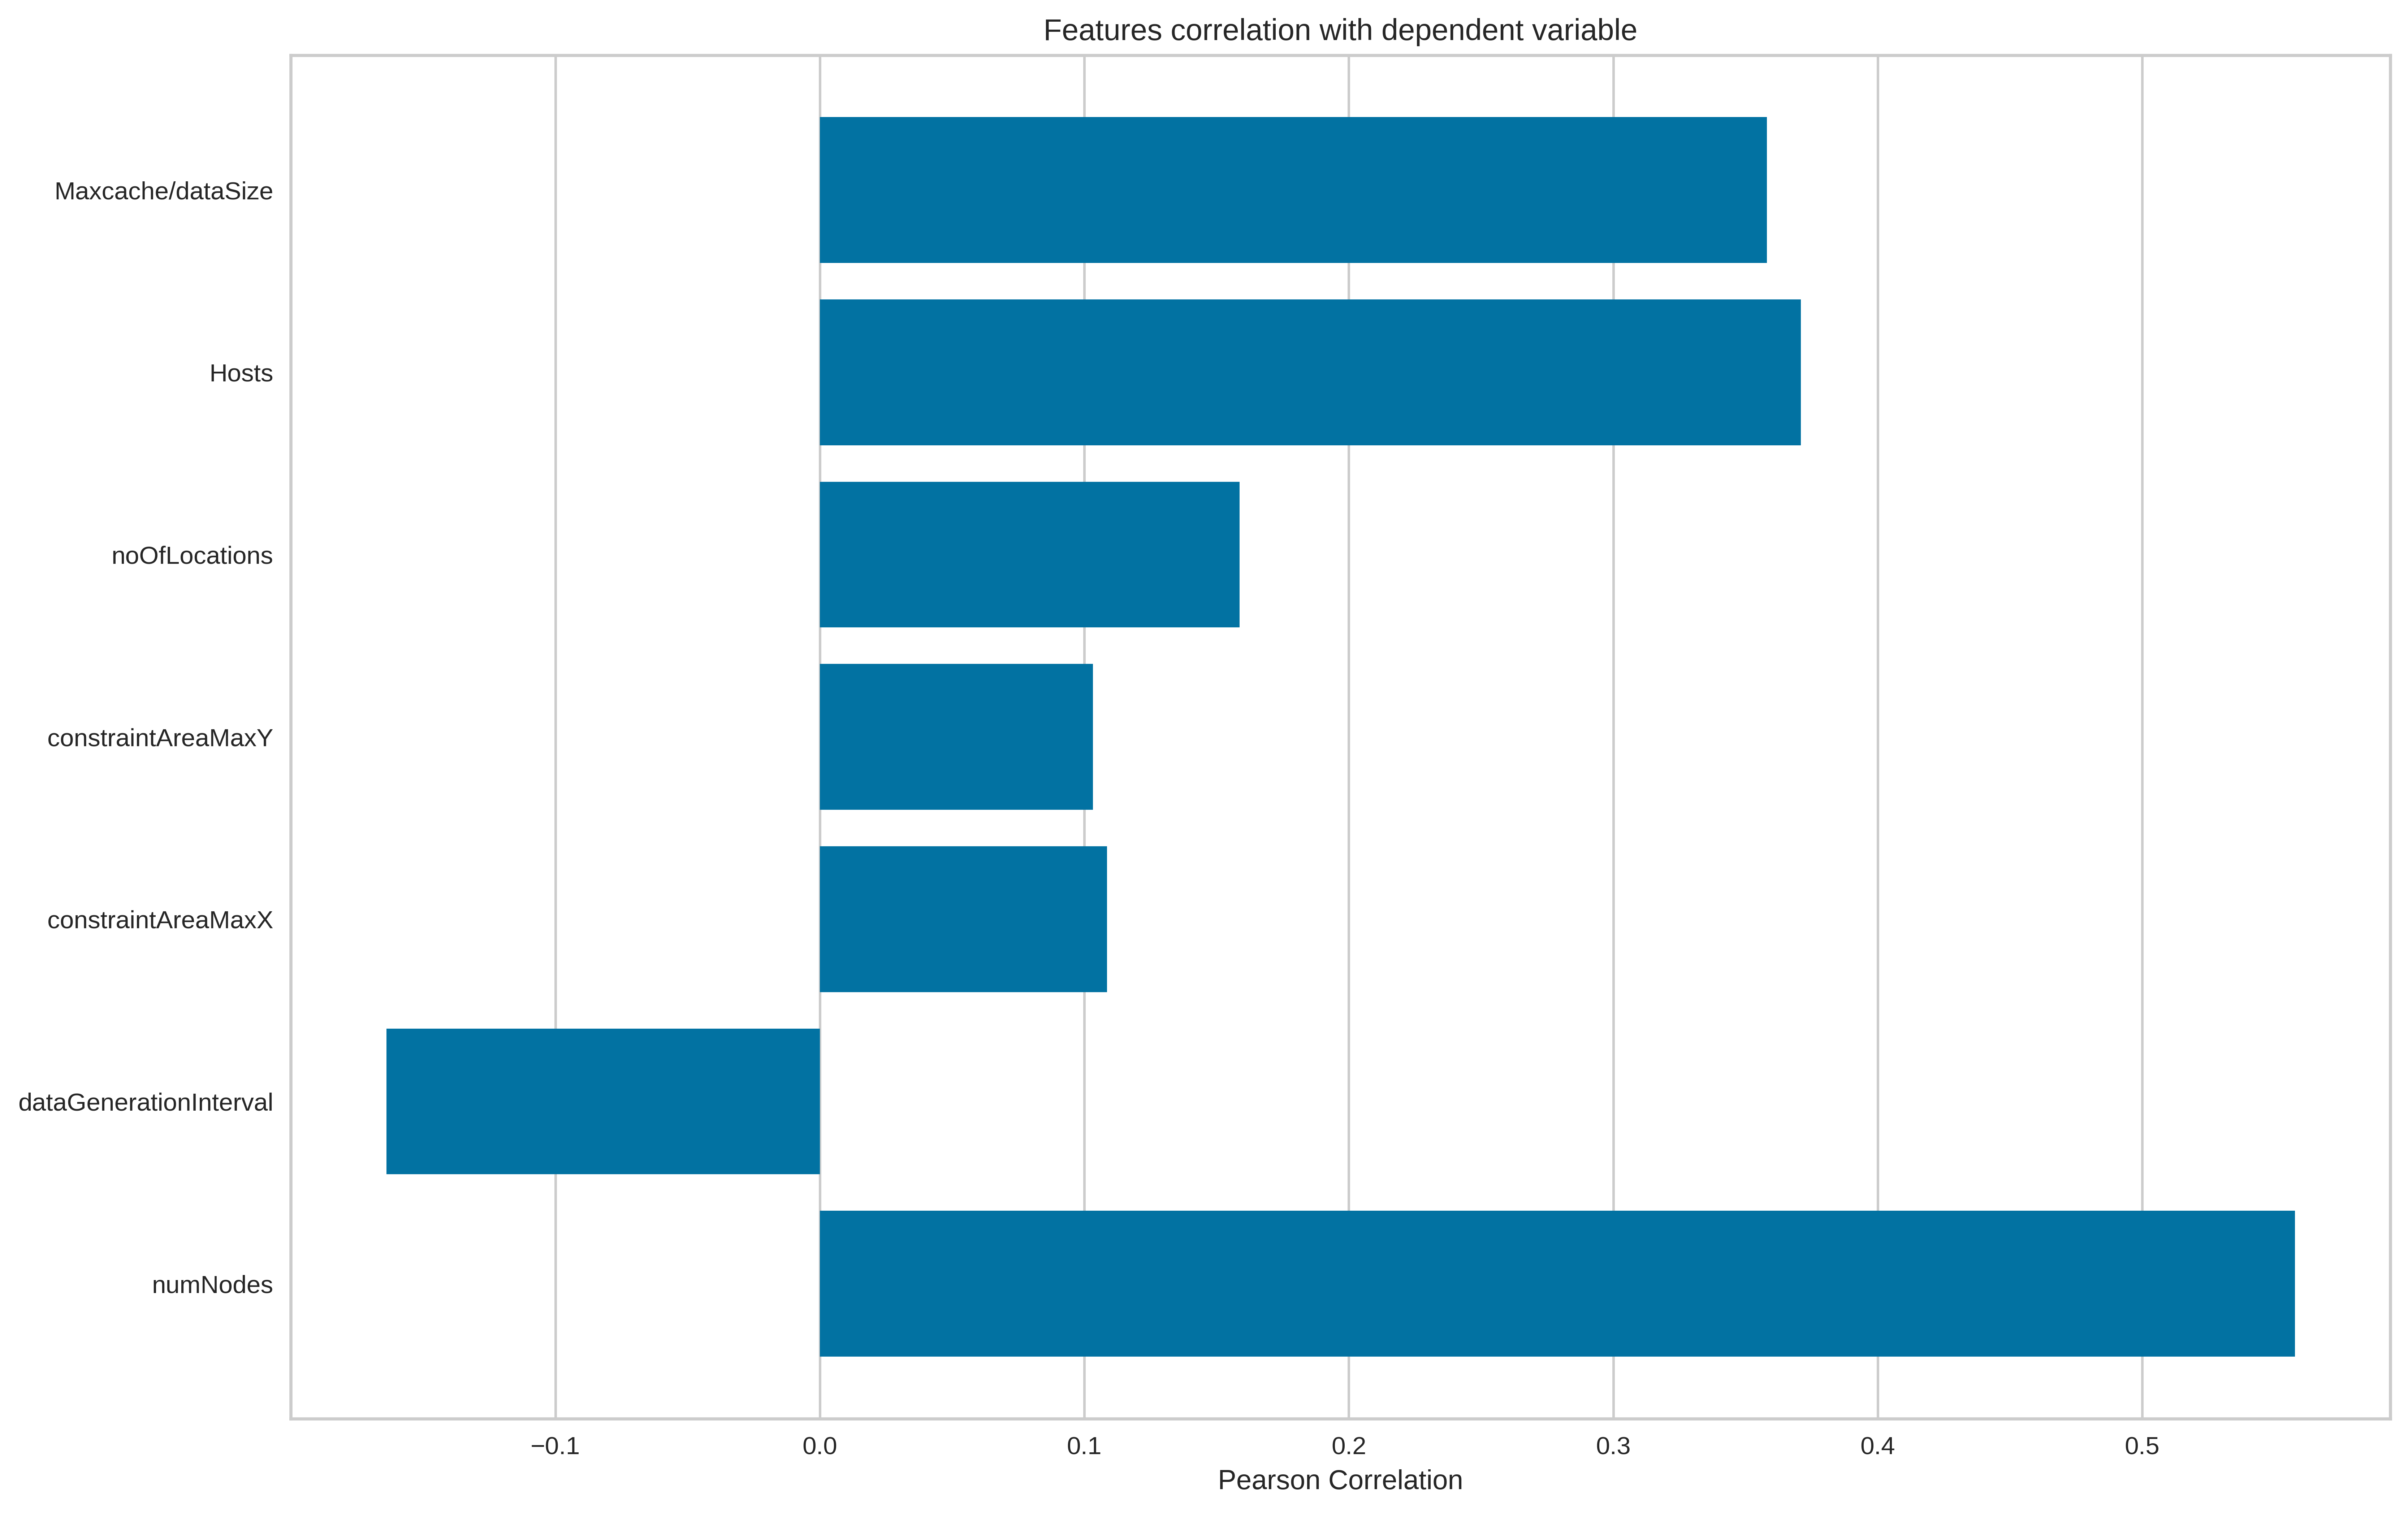

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
columnss = ['numNodes',	'dataGenerationInterval',	'constraintAreaMaxX',	'constraintAreaMaxY',	'noOfLocations',	'Hosts',	'Maxcache/dataSize']
features = np.array(columnss)
visualizer = FeatureCorrelation(labels=features)
visualizer.fit(X, y)
# visualizer.ax.set_title("Feature correlation with Peak RAM Used (Simulation)")
visualizer.show() 

In [ ]:
np.mean(cross_val_score(graphXG,X_trainNo,y_trainNo.peak_sim_ram_usage,cv=10,scoring='r2'))

[06:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:01:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:01:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.893080506955733

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
pred_cv = cross_val_predict(graphXG,X_testNo,y_testNo.peak_sim_ram_usage)

[06:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
graphXG_pred = graphXG.predict(X_testNo)

In [ ]:
mean_absolute_error(y_testNo.totaljobclocktimesec,graphXG_pred)

5013.232862790949

In [ ]:
np.sqrt(mean_squared_error(y_testNo.totaljobclocktimesec,graphXG_pred))

15939.310135133592

In [ ]:
r2_score(y_testNo.totaljobclocktimesec,graphXG_pred)

0.9481032812009079

In [ ]:
from xgboost import plot_tree

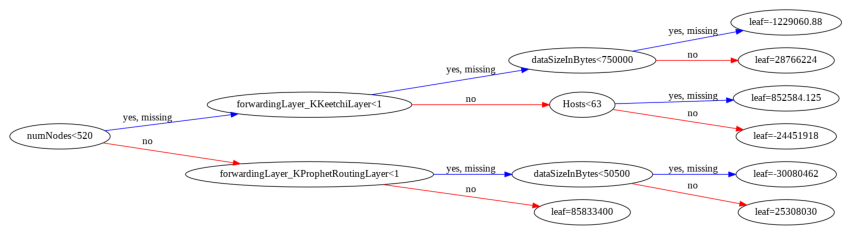

In [ ]:
plot_tree(graphXG, num_trees=398,rankdir='LR')
plt.show()

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
graphMulti = xgb.XGBRegressor(base_score=1, booster='gbtree',
             learning_rate=0.1, n_estimators=400, reg_alpha=0,reg_lambda=100,gamma=100)
multiXG = MultiOutputRegressor(estimator=graphMulti)

In [ ]:
multiXG.fit(X_trainNo,y_trainNo)

[00:12:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:12:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:12:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:12:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


MultiOutputRegressor(estimator=XGBRegressor(base_score=1, gamma=100,
                                            n_estimators=400, reg_lambda=100))

In [ ]:
pd.DataFrame(data=multiXG.predict(X_testNo),columns=y_testNo.columns).head(10)

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
0,9.722778e+10,1.649237e+10,3.110485e+10,13684.665039
1,2.560451e+10,5.091206e+09,4.357066e+09,5674.810059
2,1.854671e+10,5.000229e+09,6.333680e+09,2698.829346
3,1.085742e+11,1.017285e+11,3.228430e+10,137297.140625
4,2.588929e+11,8.356583e+10,7.066569e+10,64371.203125
5,2.588929e+11,8.356583e+10,7.066569e+10,64371.203125
6,1.695343e+11,2.423916e+10,4.105361e+10,23658.845703
7,4.810599e+09,3.416094e+09,4.405131e+09,1646.448608
8,1.509781e+11,4.296605e+10,5.557425e+10,65044.691406
9,2.016068e+11,4.428712e+10,7.906301e+10,91043.570312


In [ ]:
y_testNo.head(10)

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
280,84897653578,19223175168,30879481856,15065.579751
78,25071964336,8063668224,3907334144,5934.689841
113,13587802598,4846149632,5762838528,1221.102267
253,113247869508,104445530112,33005178880,138686.803866
324,294335171667,37078020096,75945639936,62546.331393
327,294335171667,37078020096,75945600218,61300.331393
291,160455324120,21932234120,36582158336,21003.863761
82,8142837272,3093155840,3799887872,723.394159
365,154844640870,43862445056,57695074304,65177.139505
401,177243982036,46596026368,77978505216,91900.812183
